Camilo Garcia 201417471

# Taller 4 #

## SERIES DE FURIER ##

### OBJETIVOS ###

- Comprender el uso y funcion de la transformada de furier y sus derivados
- Familiarizarse con el su de la transformada de furier y sus derivadas en jupyter notebook en la libreria numpy
- Utilizar el uso de la transformada de furier en un ejemplo aplicado

### CODIGO ###

La seccion siguiente del codigo es la iniciacion e importacion de librerias en jupyternotebook. Despues de eso se empezara con los ejemplos de la transformada de furier.

### Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT ###

La primera parte del codigo es el uso directo de la transoformada de Furier. Ademas de transformar la funcion a la cual se le aplica la transformada, TF hace 3 cosas principales: Cambiar el dominio de la funcion de [0,L] a [-L,0]; ademas multiplica todo lo demas por el valor de -1 y por ultimo, asume que la funcion trabaja en un periodo de 2pi.


In [26]:
%pylab inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import ndimage
import string
import matplotlib.cm as cm
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc

Populating the interactive namespace from numpy and matplotlib


/Users/camilogarciatorres/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Fast furrier transformation en Python ##

Se realiza la aplicacion de la FFT con la funcion gaussiana. Entre las caracteristicas principales de esta funcion es que asume que la funcion trabaja en un dominio de 2*pi, ademas cambia los valores de la funcion de [0,L] a [-L,0]. La funcion gaussiana a la cual se le aplica la transformada de Furier es igual a:

<center>$f(x)=exp(-x^2)$</center>



Text(0,0.5,'real[FFTshitf(U)]')

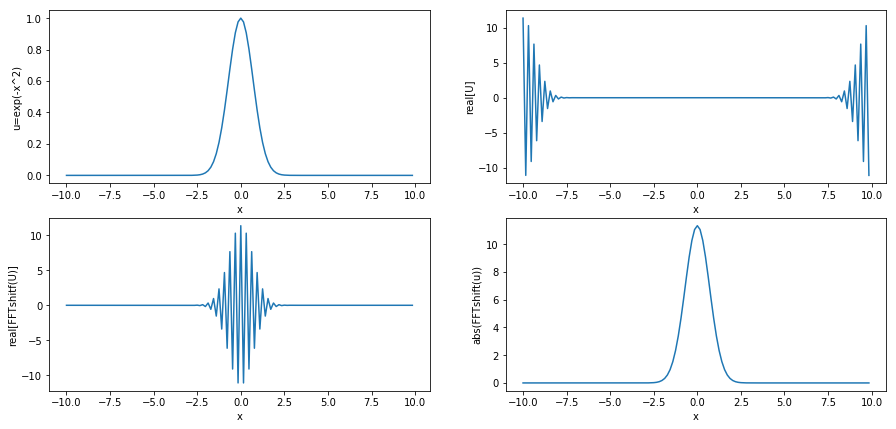

In [27]:
L=20
n=128 

x2=np.linspace(-L/2,L/2,n+1)
x=x2[0:n]
u=np.exp(-1*(x**2))
ut=np.fft.fft(u)
utshift=np.fft.fftshift(ut)

figure(figsize(15,7))
plt.subplot(2,2,1)
plt.plot(x,u)
xlabel('x')
ylabel('u=exp(-x^2)')


plt.subplot(2,2,2)
plt.plot(x,np.real(ut))
xlabel('x')
ylabel('real[U]')

plt.subplot(2,2,4)
plt.plot(x,np.abs(utshift))
xlabel('x')
ylabel('abs(FFTshift(u))')

plt.subplot(2,2,3)
plt.plot(x,np.real(utshift))
xlabel('x')
ylabel('real[FFTshitf(U)]')

## FFT versus Finite-Difference Differentiation ##

<div style="text-align: justify"> En esta seccion se discuten los errores que conlleva la transformada rapida de fuerier con la diferenciacion finita. La funciones de taylor (diferenciacion finita) tambien puede ser utilizada para derivacion. La principal diferencia es que el metodo de las series de taylor las aproximaciones son locales ya que utilizan a los puntos vecinos mientras que la FFT la aproximacion es global ya que usa una expansion basada en senos y cosenos. </div>

Para el caso a continuacion las funciones a puntos son las FFT mientras que las aproximaciones de Taylor son continuas.

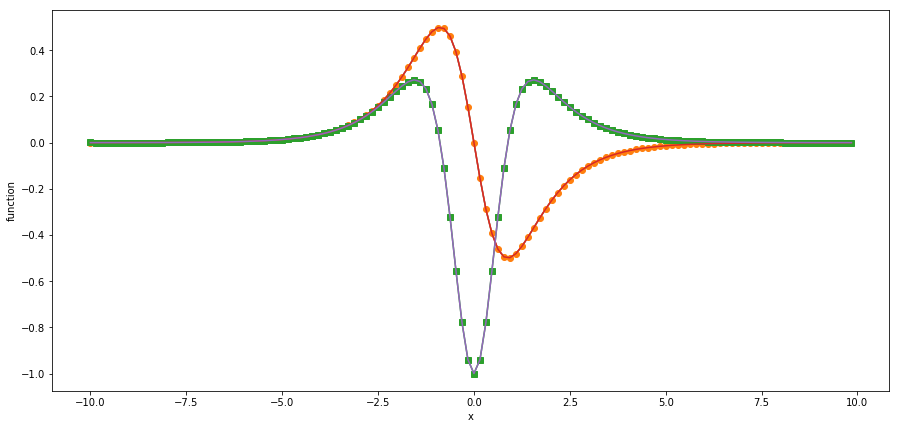

In [28]:
 
L=20; #define the computational domain [-L/2,L/2]
n=128; # define the number of Fourier modes 2^n
x2=np.linspace(-L/2,L/2,n+1); #define the domain discretization
x=x2[0:n]; #consider only the first n points: periodicity
dx=x[1]-x[0]; #dx value needed for finite difference
u=1/np.cosh(x); #function to take a derivative of
ut=np.fft.fft(u); #FFT the function
v=concatenate((arange(0,n/2),arange(-n/2,0)))
k3=v*(2*np.pi/L)

#FFT calculation of derivatives
ut1=k3*ut*1J; #first derivative
ut2=-k3*k3*ut; # second derivative
u1=np.real(np.fft.ifft(ut1)); 
u2=np.real(np.fft.ifft(ut2)); # inverse transform
u1exact=-(1/np.cosh(x))*np.tanh(x); #analytic first derivative
u2exact=(1/np.cosh(x))-2*(1/np.cosh(x))**3; # analytic second derivative

#Finite difference calculation of first derivative
#2nd-order accurate
ux=zeros(size(u))
ux[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)
for j in range(1,n-1):
    ux[j]=((u[j+1]-u[j-1])/(2*dx))
ux[-1]=((3*u[-1]-4*u[-2]+u[-3])/(2*dx))

#4th-order accurate
ux2=zeros(size(u))
ux2[0]=((-3*u[1]+4*u[2]-u[3])/(2*dx))
ux2[1]=((-3*u[2]+4*u[3]-u[4])/(2*dx))

for j in range(2,n-2):
    ux2[j]=((-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/[12*dx])
    
ux2[-2]=((3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx))
ux2[-1]=((3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx))


plt.plot(x,u1)
plt.plot(x,u1, marker='o')
plt.plot(x,u2,marker='s')
plt.plot(x,u1exact)
plt.plot(x,u2exact)
xlabel('x')
ylabel('function')
plt.show()


<div style="text-align: justify"> A continuacion se comparara los 2 metodos de diferenciacion. Los puntos azules son la derivada por series de Taylor, mientras que los lineas son la derivada por el metodo de FFT. Como podemos ver la diferencia no es muy significativa entre los 2 metodos pero existe. La primer figura muestra una diferencia de 10^-2 en la diferenciacion de segundo orden. La segunda figura muestra una diferencia de 10^-5 en diferenciacion de cuarto orden. Por ultimo, la termecr imagen muestra una diferencia de 10^-6 entre el metodo FFT y la aproximacion de Taylor para la diferenciacion de primer orden. </div>

[-0.9376, -0.9374, 0.498487, 0.498488]

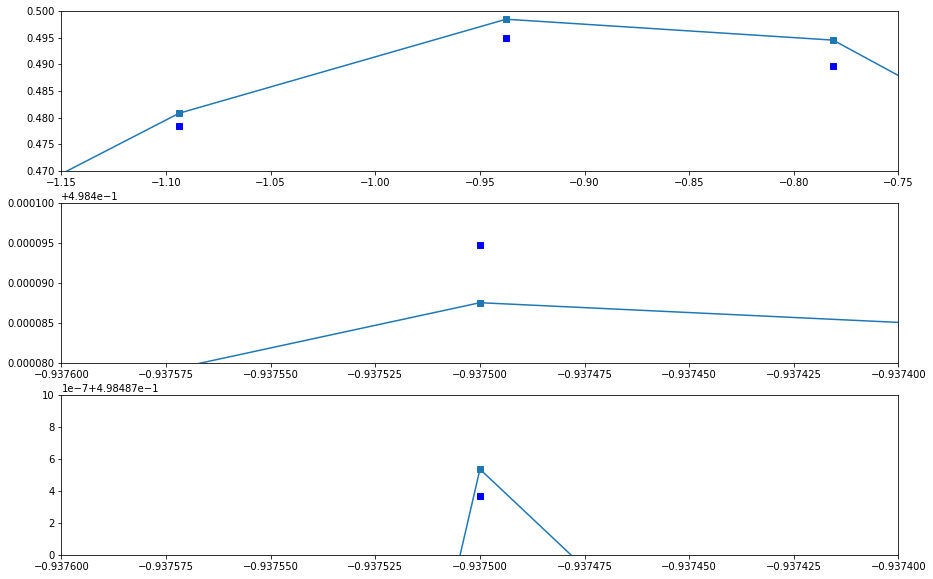

In [29]:
figure(figsize(15,10))
plt.subplot(3,1,1)
plt.plot(x,ux, 'bs')
plt.plot(x,ux2, marker='s')
plt.axis([-1.15, -0.75, 0.47, 0.5])

plt.subplot(3,1,2)
plt.plot(x,u1exact, marker='s')
plt.plot(x,ux2, 'bs')
plt.axis([-0.9376, -0.9374, 0.49848, 0.49850])

plt.subplot(3,1,3)
plt.plot(x,u1exact, marker='s')
plt.plot(x,u1, 'bs')
plt.axis([-0.9376, -0.9374, 0.498487, 0.498488])

 ## FFT Application: Radar Detection and Filtering ##

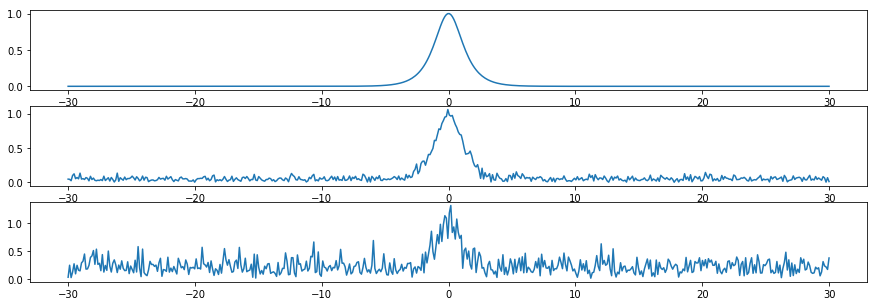

In [30]:
L=30; # time slot to transform
n=512; #number of Fourier modes 2^9
t2=np.linspace(-L,L,n); 
t=t2[0:n]; #time discretization

v=concatenate((arange(0,n/2),arange(-n/2,0)))
k3=v*(2*np.pi/(2*L))
u=1/np.cosh(t); #ideal signal in the time domain


figure(figsize(15,5))
plt.subplot(3,1,1 )
plot(t,u)



noise=1;
ut=np.fft.fft(u);
utn=(noise*np.random.randn(1,n)+np.random.randn(1,n)*1J)+ut
un=np.fft.ifft(utn);
un=np.reshape(un,(512,), order='F')
plt.subplot(3,1,2)
plot(t,abs(un))


noise2=4;
utn2=(noise2*(np.random.randn(1,n)+np.random.randn(1,n)*1J))+ut
un2=np.fft.ifft(utn2);
un2=np.reshape(un2,(512,), order='F')
plt.subplot(3,1,3)
plot(t,abs(un2))

Text(0,0.5,'|ut|/max(|ut|)')

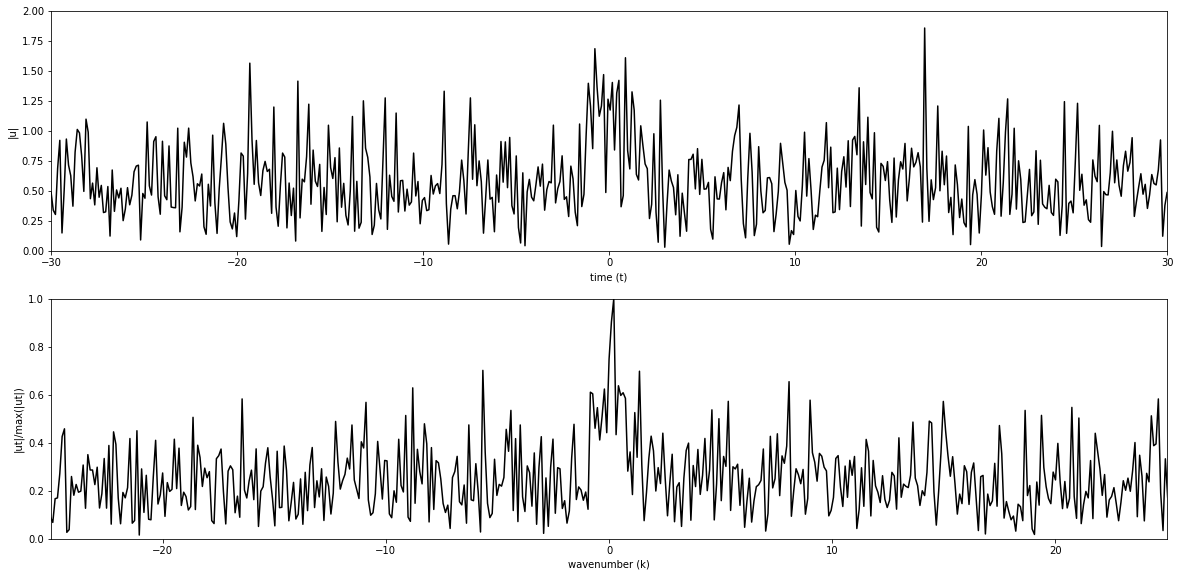

In [31]:


noise=10;
ut=np.fft.fft(u);
unt=(noise*(np.random.randn(1,n)+np.random.randn(1,n)*1J)+ut)
un=np.fft.ifft(unt);
un=np.reshape(un,(512,), order='F')

figure(figsize(20,15))
subplot(3,1,1)
plot(t,abs(un),'k')
plt.axis([-30, 30, 0, 2])
xlabel('time (t)')
ylabel('|u|')


unt=np.reshape(unt,(512,), order='F')
subplot(3,1,2)
plot(np.fft.fftshift(k3),abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))),'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')





/Users/camilogarciatorres/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[-25, 25, 0, 1]

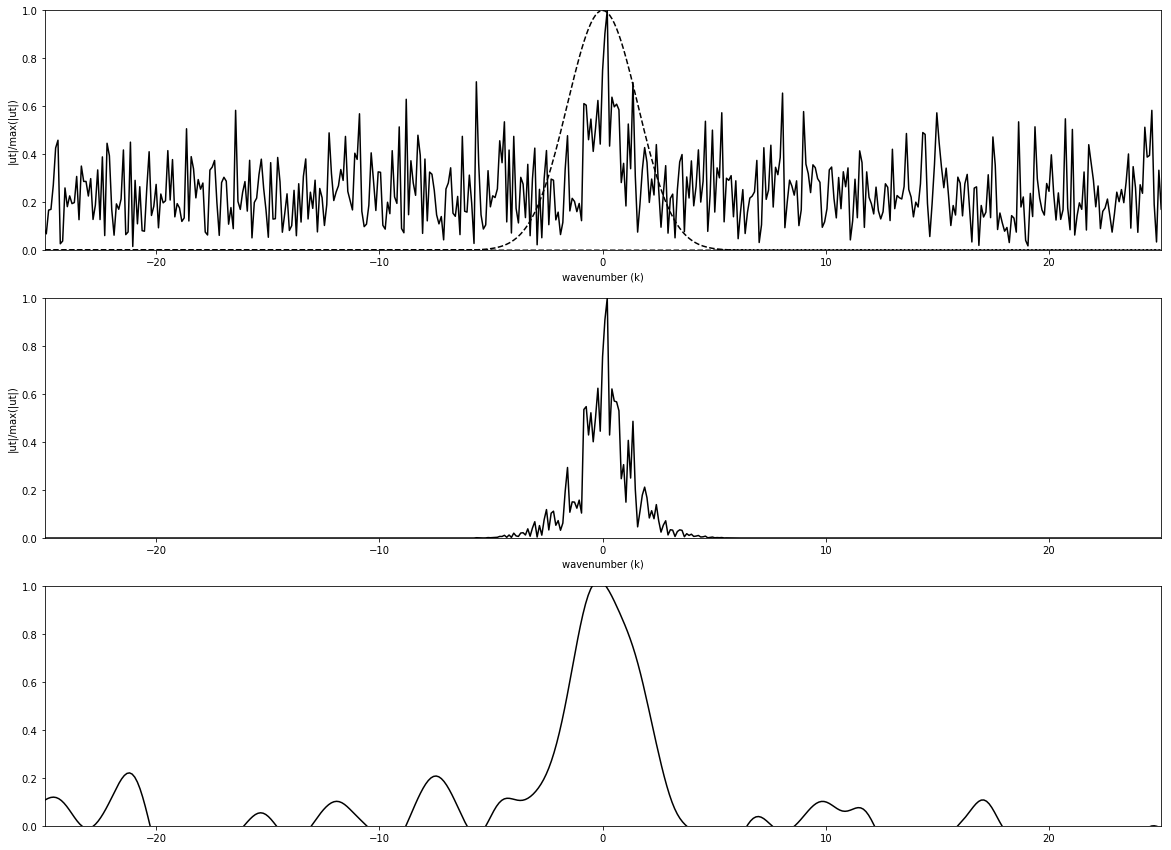

In [32]:
f=exp(-0.2*(k3)**2)

unft=f*unt;
unf=np.fft.ifft(unft);
figure(figsize(20,15))
subplot(3,1,1)
plot(np.fft.fftshift(k3),abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))),'k' )
plot(k3,f, 'k--')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')



subplot(3,1,2)
plot(np.fft.fftshift(k3),abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))), 'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')


subplot(3,1,3)

plot(t,unf, 'k')      
axis([-25, 25, 0, 1])

[-25, 25, 0, 1]

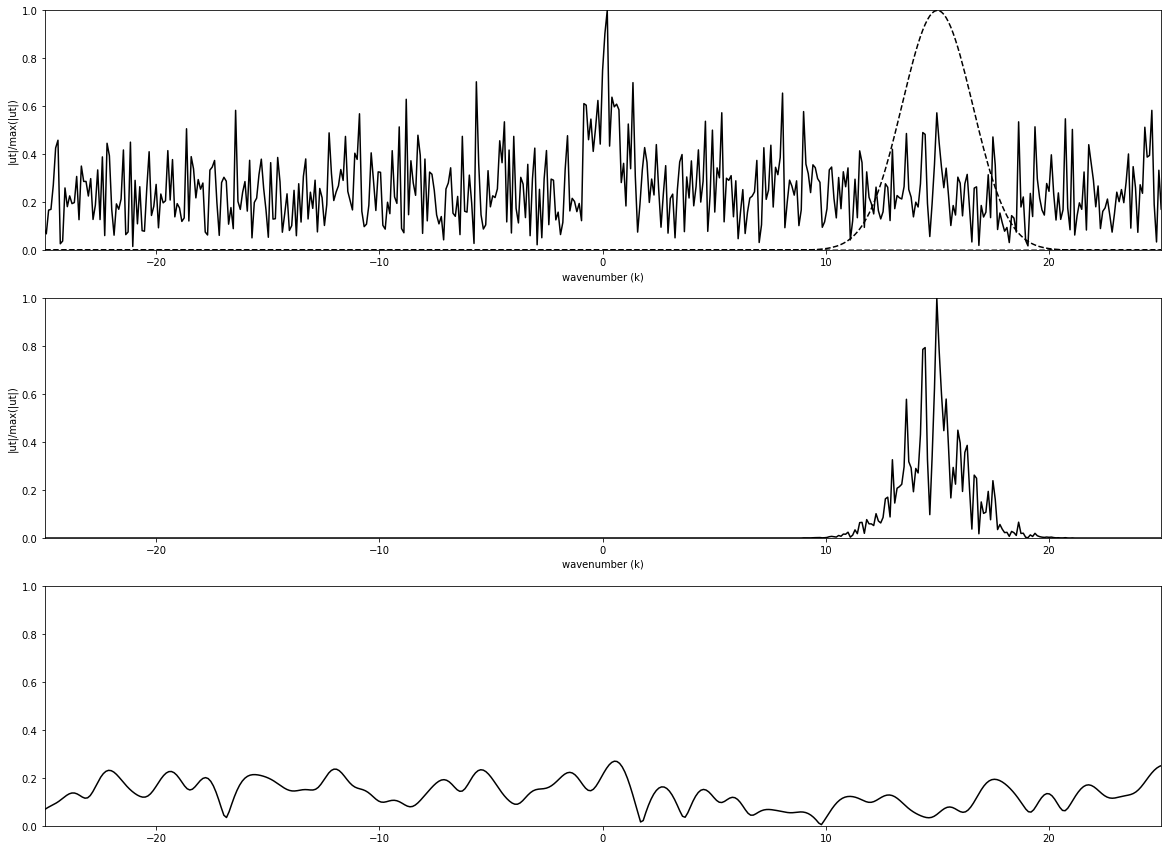

In [33]:
f=exp(-0.2*(k3-15)**2)
unft=f*unt;
unf=np.fft.ifft(unft)


figure(figsize(20,15))
subplot(3,1,1)
plot(np.fft.fftshift(k3),abs(np.fft.fftshift(unt))/max(abs(np.fft.fftshift(unt))),'k' )
plot(k3,f, 'k--')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')

subplot(3,1,2)
plot(np.fft.fftshift(k3),abs(np.fft.fftshift(unft))/max(abs(np.fft.fftshift(unft))), 'k')
axis([-25, 25, 0, 1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')

subplot(3,1,3)
plot(t,abs(unf), 'k')      
axis([-25, 25, 0, 1])

## FFT Application: Radar Detection and Averaging ##

/Users/camilogarciatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


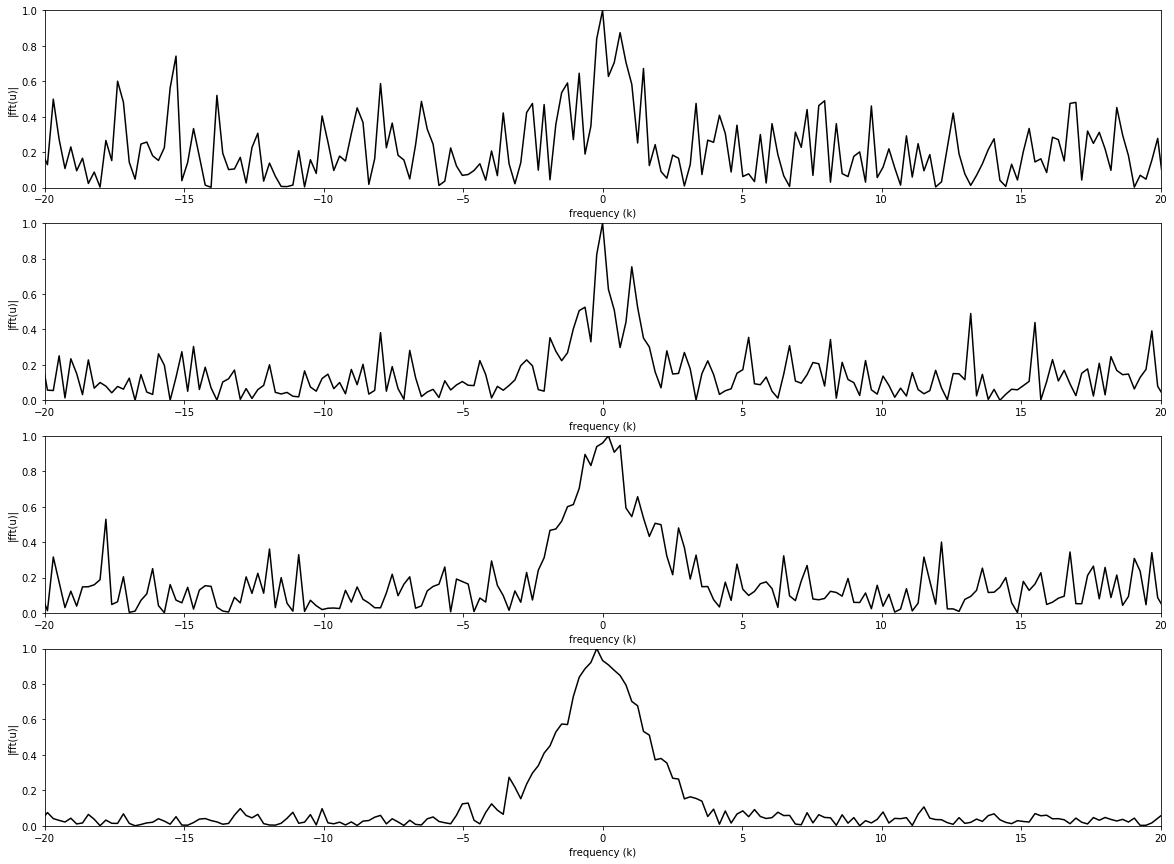

In [34]:
L=30 #time slot
n=512 #Fourier modes
t2=linspace(-L,L,n+1)
t=t2[0:n];
v=concatenate((arange(0,n/2),arange(-n/2,0)))
k3=v*(2*np.pi/L)
ks=np.fft.fftshift(k3);
noise=10;
realize=[1,2,5, 100]
dat=np.zeros((100,n))

for i in range (0,size(realize)):
    u=1/np.cosh(t)
    ave=np.zeros(n)
    utn=np.zeros((realize[i],n))
   
    for j in range (0,realize[i]):
        
        utn[j]=(noise*(np.random.randn(n)+np.random.randn(n)*1J)+ut)
        ave=ave+utn[j];
        dat[j]=abs(np.fft.fftshift(utn[j]))/max(abs(utn[j]))
        
    

    ave=abs(np.fft.fftshift(ave))/realize[i]
    
    ave=np.reshape(ave,(512,), order='F')
    ks=np.reshape(ks,(512,), order='F')
    
    subplot(4,1,i+1)
    plot(ks,abs(ave/max(ave)),'k')
    axis([-20, 20, 0, 1])
    ylabel('|fft(u)|')
    xlabel('frequency (k)')


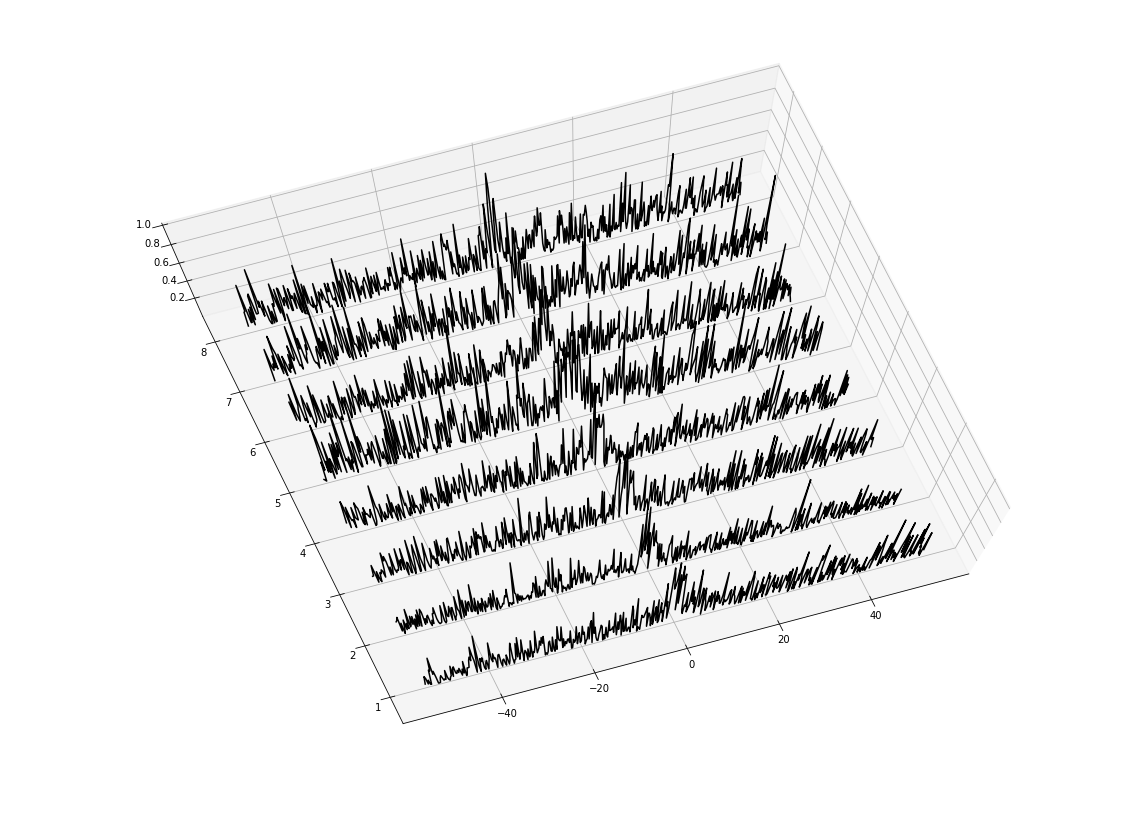

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range (0,8):
    ax.plot(ks, zeros(n)+i+1,dat[i], 'k')

ax.view_init(80,250)



In [166]:
slice=[0,0.5,10];
t2=linspace(-L,L,n+1)
t=t2[0:n];

[T,S]=meshgrid(t,slice);
[K,S]=meshgrid(k3,slice);

U=1/(np.cosh(T-10*sin(S))*np.exp(1*i*0*T));

for i in range (size(slice)):
    ax.plot(T[i,:],zeros(n)+S[i,:], U[i,:], 'k')
    ax.view_init(80,250)
    plt.show()

    
Ut=[]
Kp=[]
Utp=[]
Utn=[]
Utnp=[]
Un=[]

for j in range (1,size(slice)):
   
    Uta=np.fft.fft(U[j]);
    Ut.append(Uta)
    Kpa=np.fft.fftshift(K[j]);
    Kp.append(Kpa)
    Utpa=np.fft.fftshift(Ut[j]);
    Utp.append(Utpa)
    Utna=Ut[j]+noise*(randn(n)+i*randn(n));
    Utn.append(Utna)
    Utnpa=np.fft.fftshift(Utn[j])/max(abs(Utn[j]));
    Utnp.append(Utnpa)
    Una=np.fft.ifft(Utn[j]);
    Un.append(Una)

IndexError: list index out of range

In [145]:
import wave

w = wave.open("guitar.wav", "rb")
binary_data = w.readframes(w.getnframes())

length = w.getnframes()
for i in range(0,length): 
    if binary_data is not binary_data[0]:
        silencio=binary_data[0]
        tune=binary_data[i]
        
print (tune)



64


## EJEMPLO ##

El ejemplo propio consiste en una funcion que lea un archivo WAV de guitarra, lo filtre y analize si el sonido esta guitarra esta entonada o no. A continuacion se presenta el codigo

In [182]:
def entonarguitarra(nombreaudio):

    w2 = wave.open(nombreaudio, 'r')
    w = wave.open('guitar.wav', "rb")
    binary_data = w.readframes(w.getnframes())
    binary_data2 = w2.readframes(w2.getnframes())
    length = w.getnframes()
    for i in range(0,length): 
        if binary_data is not binary_data[0]:
            
            tune=binary_data[i]

    length2 = w2.getnframes()
    for i in range(0,length2): 
        if binary_data2 is tune:
            print("la guitarra esta sintonizada")
    else:
            print("desentonado")

In [183]:
entonarguitarra('getready2.wav')

desentonado


In [165]:
def entonarguitarra(nombreaudio):

    w2 = wave.open(nombreaudio, 'r')
    w = wave.open('guitar.wav', "rb")
    binary_data = w.readframes(w.getnframes())
    length = w.getnframes()
    for i in range(0,length): 
        if binary_data is not binary_data[0]:
            tune=binary_data[i]
    
    signal= w2.readframes(-1)
    signal= np.fromstring(signal, 'Int16')

    transformada=np.fft.fft(signal)
    inversa= np.fft.fftshift(transformada)
    x= size(inversa)
    inversa=inversa.tobytes()
    binary_data2 = inversa.readframes(inversa.getnframes())
    
    

/Users/camilogarciatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  


AttributeError: 'bytes' object has no attribute 'readframes'

Como podemos ver, la funcion sirve al convertir un archivo WAV a un archivo binario. El problema nace al tratar de convertir el archivo a un array, filtrarlo y convertirlo a binario de nuevo para compararlo con el archivo inicial. Aun asi, la funcion entonarguitarra() cumple su funcion propuesta al inicio. Otra aclaracion importante es que en el codigo de la funcion, el ultimo else le falta una identacion() donde compara cada dato del archivo uno a uno pero la funcio imprimprimiraa miles de print("desentonado"), por efectos practicos se deja el else por fuera para que solo imprima un "desentonado".

## Conclusiones ##

- La aplicacion de las transformadas de furier son infinitos como filtrado, diferenciacion y promediado.
- La funcion FFT asume que la funcion trabaja en un dominio de 2*pi, cambia los valores de la funcion de [0,L] a [-L,0] y todos los demas valores del "modo" los multiplica por -1.
- La diferencia entre la derivacion por series de Taylor y FFT es muy baja (del orden de los 10^-2) por lo tanto las 2 aproximaciones son validas y depende de la aplicacion especifica elegir una sobre otra.
- ax.plot es una libreria de phyton para plotear en 3D
- Es posible realizar aplicaciones de filtrado y sintonizado propio que pueden resultar muy utiles con las herramientas de phyton.